In [1]:
import pandas as pd  
import numpy as np     
import matplotlib.pyplot as plt     
import seaborn as sns  

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [1]:
import sys
sys.path.append('../models/')

# custom built regression class to assist with quick scikit-learn regression modeling 
from regression_trainer import RegressionTrainer
from constants import EDA_PLOT_DIR

In [3]:
# load datasets 
df_ev = pd.read_csv("../data/ElectricCarData_Clean.csv")
df_charging = pd.read_csv("../data/station_data_dataverse.csv")




![ev](../images/adobe_stock_img_ev.jpg)


# Introduction 

The goal of this notebook is to perform Exploratory Data Analysis on a [**EV dataset**](https://www.kaggle.com/datasets/geoffnel/evs-one-electric-vehicle-dataset/data) from Europe and a [**EV charging dataset**](https://www.kaggle.com/datasets/michaelbryantds/electric-vehicle-charging-dataset) from the United States. 

Although these datasets are representative of two different world regions, there might be ways in which we can combine them to draw even more insights about EV use and the EVs themselves. 

The EV dataset from the US contains spec information about a wide range of EVs: plug type, number of seats, battery range and more. 

The EV charging data from the EU contains EV charging information: length of charge, price per kW, date of charge, and more. 

We will begin by answering a few questions about each dataset in turn, following up on those initial answers with further investigation that seems fruitful, then attempting to combine the datasets in a way in which we can then draw useful and valid conclusions; this might not be possible since each dataset is representative of entirely different societies but there's only one way to find out - investigate! 

## Initial Questions and Hypotheses 

Here we will state some questions we'd like answered and hypothesis we'd like to test from a glance of the dataset. 

Some initial questions we have about the EV dataset

1) Which brands of EVs have the best performance? 
2) Which brands of EVs are most energy efficient?
3) What's the distribution of prices by brand?

Initial Hypotheses to test
1) Brand and Model of EV performance is directly correlated with EV price

In [4]:
df_ev.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


Some questions we have about the EV charging dataset from the start are: 

1) What's are the distributions of charging time, total kWh charged, charging cost, and charging dates?
2) What's the distribution of distance between user home and charging station?
3) What's the distribution of user's phone's OS? 

Initial Hypotheses to test
1) Weekend EV charges are longer than weekday EV charges 
2) Majority of EV owners use the same small number of charging stations

In [5]:
df_charging.head()

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0


-----

## EV Data Set

In this section, we will exclusively focus on the EV data set which include various features of EVs from different brands. 
This section will be complete when we answer the following questions and test the following hypothesis. 

### Exploratory Analysis of EV Dataset 

Questions

1) Which brands of EVs have the best performance? 
2) Which brands of EVs are most energy efficient?
3) What's the distribution of prices by brand?

Hypothesis
1) Brand and Model of EV performance is directly correlated with EV price

In [6]:
df_ev.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [7]:
# strip white spaces from strings
df_ev.Brand = df_ev.Brand.apply(lambda b: b.strip())
df_ev.Model = df_ev.Model.apply(lambda m: m.strip())
df_ev.replace('-', None, inplace=True)
df_ev.dropna(inplace=True) # only 5 rows 

In [8]:
df_ev.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [9]:
df_ev.dtypes

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH      object
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Segment             object
Seats                int64
PriceEuro            int64
dtype: object

In [10]:
# Acceleration 0-100 km/h  ranges between 2 and 14 seconds - that's a wide difference in performance! 
# Topspeed khH range from 123 to 410 with a median of 167 - which EV has a top speed of 410?
# Range Km varies widely from 170 to 970 with a median of 350 - which EV has a range of 970?
# Efficiency WhKm ranges from 104 to 273 with a median of 181 - nothing unusual here
# Seats vary from 4 seaters to 7 seats - most EV have 5 seats 
# price in Euros varies from 20K to 215K with a median of 45K - 215K is an outlier 
df_ev.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,7.046939,181.653061,350.153061,189.867347,4.959184,57324.683673
std,2.483895,43.248527,118.217984,30.055837,0.687418,34288.246370
min,2.100000,123.000000,170.000000,104.000000,4.000000,20129.000000
25%,5.100000,150.000000,258.750000,168.000000,5.000000,35000.000000
50%,7.300000,167.000000,350.000000,181.000000,5.000000,45000.000000
75%,8.950000,200.000000,407.500000,206.000000,5.000000,65465.000000
max,14.000000,410.000000,970.000000,273.000000,7.000000,215000.000000


/var/folders/_b/bg10lw5s3qv87q59tkf0hsrc0000gn/T/ipykernel_11345/561935234.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


/var/folders/_b/bg10lw5s3qv87q59tkf0hsrc0000gn/T/ipykernel_11345/561935234.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
/var/folders/_b/bg10lw5s3qv87q59tkf0hsrc0000gn/T/ipykernel_11345/561935234.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
/var/folders/_b/bg10lw5s3qv87q59tkf0hsrc0000gn/T/ipykernel_11345/561935234.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
/var/folders/_b/bg10lw5s3qv87q59tkf0hsrc0000gn/T/ipykernel_11345/561935234.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecat

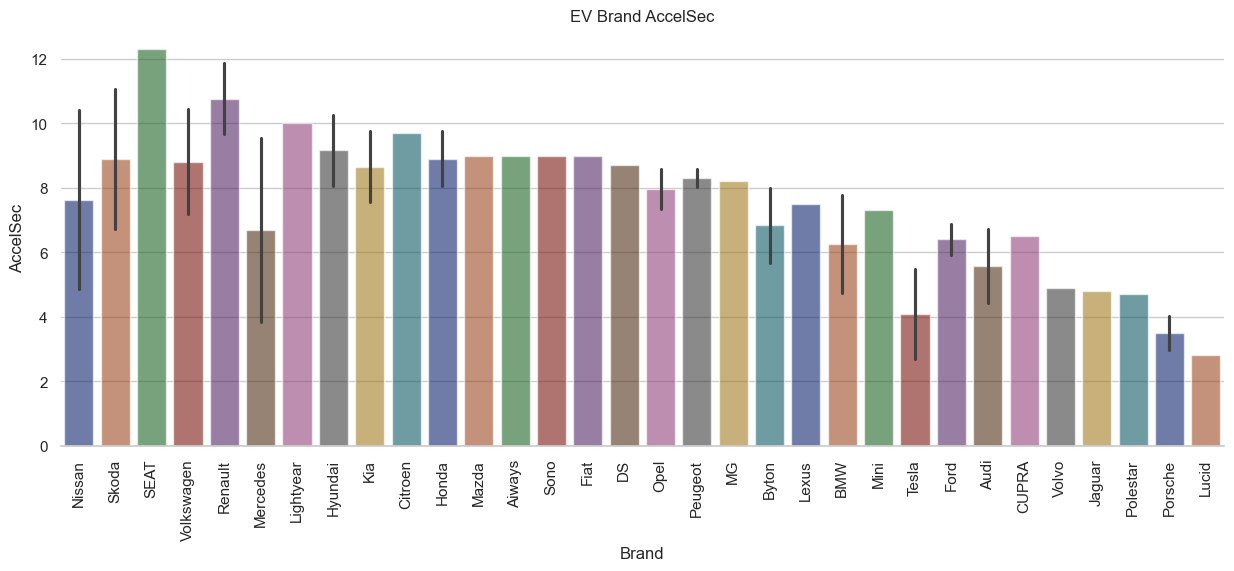

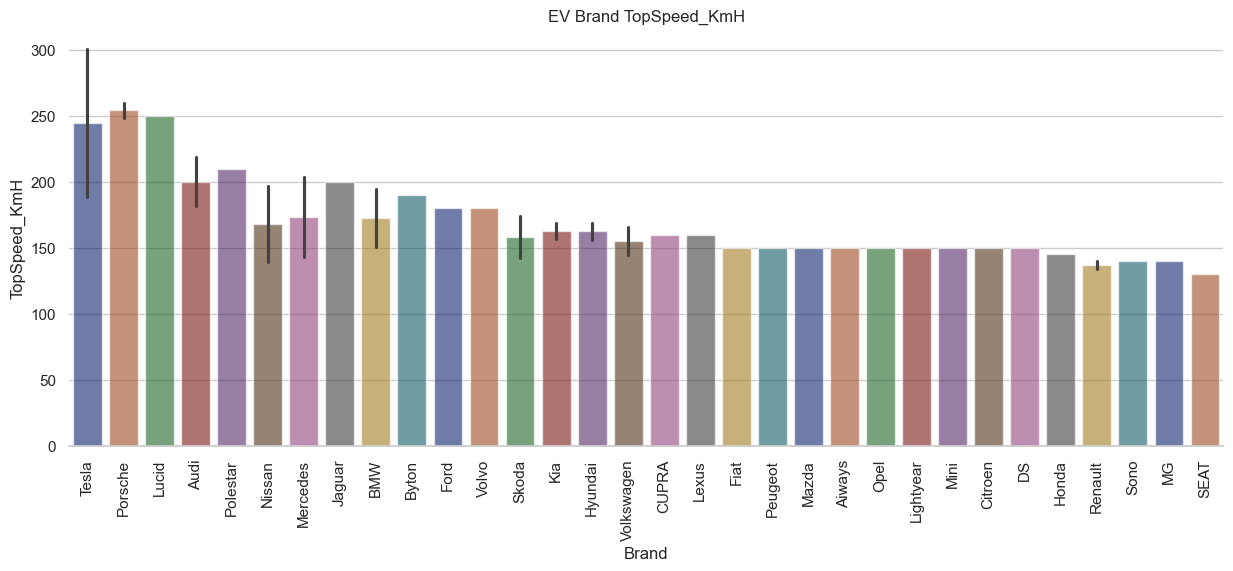

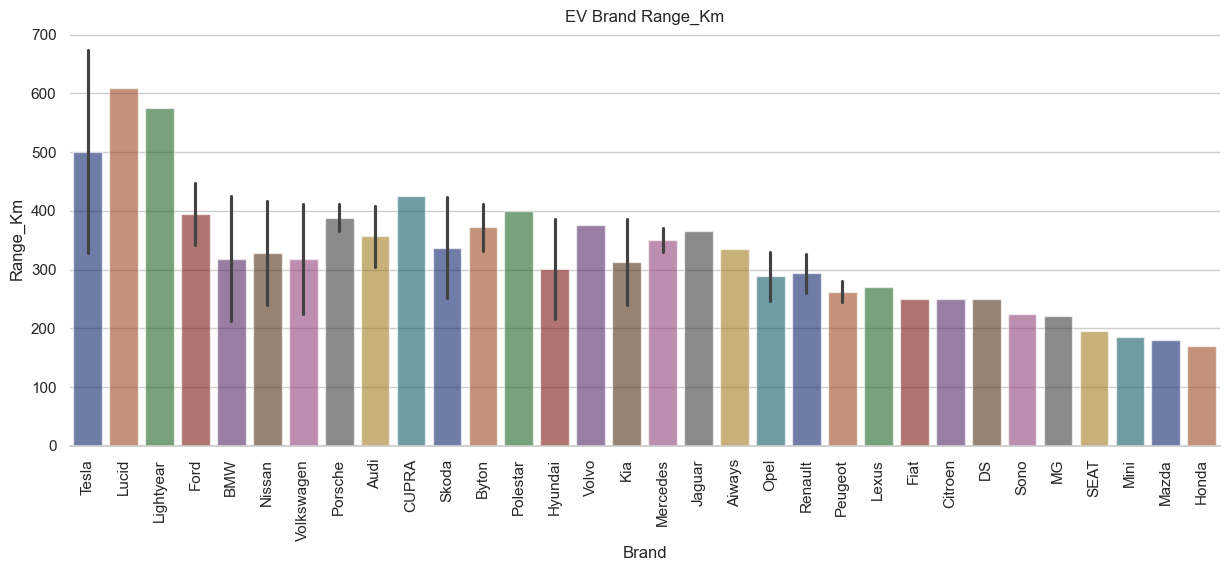

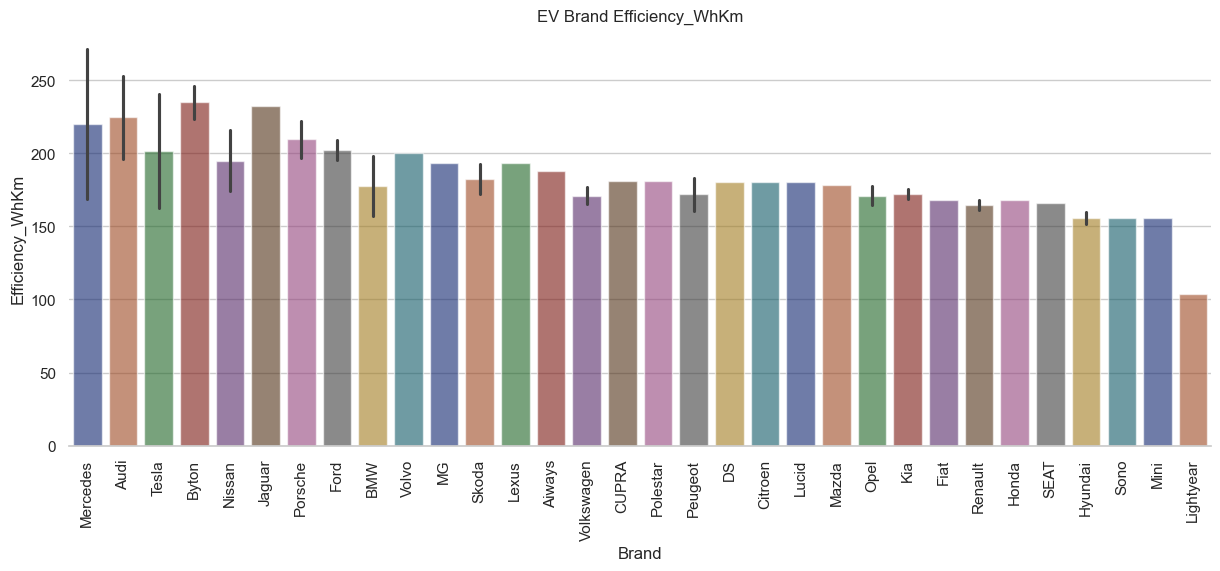

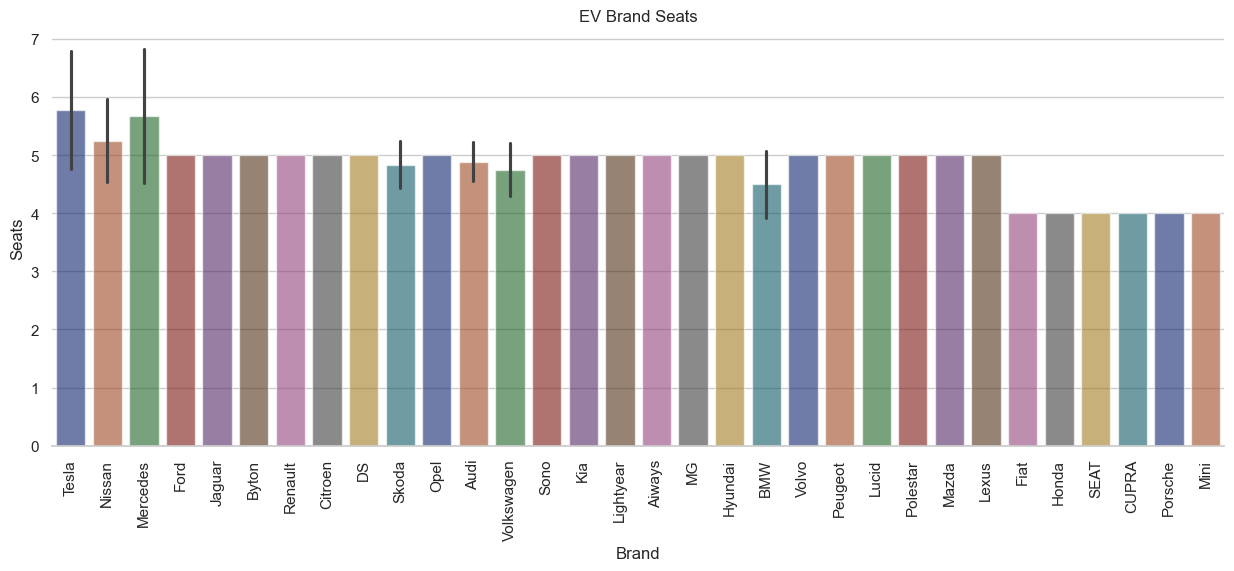

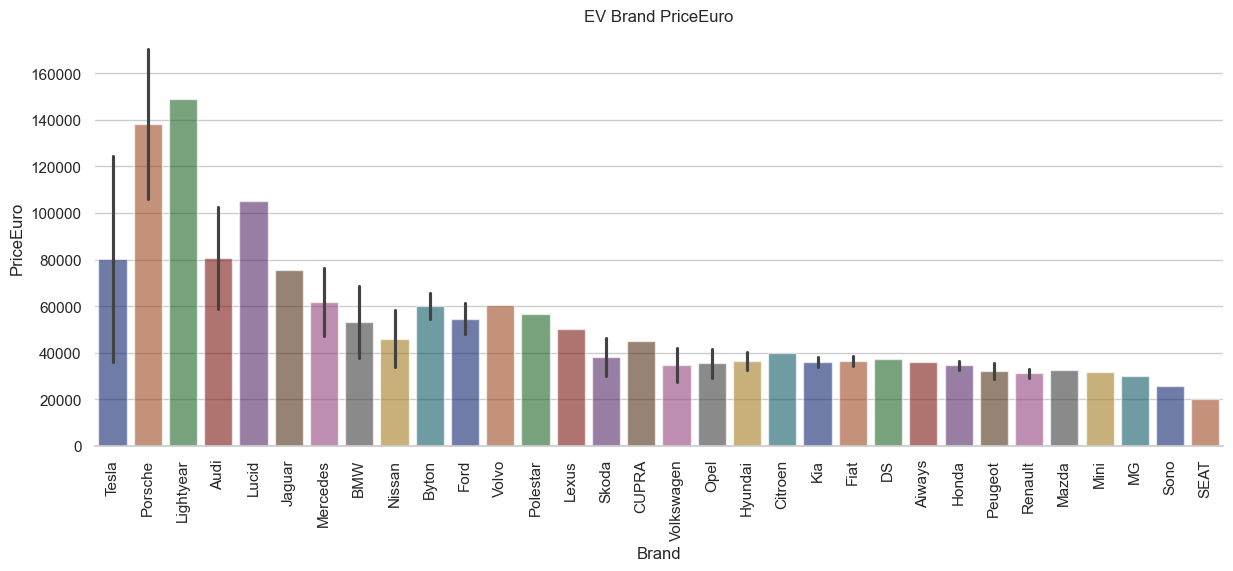

In [11]:
# plot box plots between brands and EV features 

sns.set_theme(style="whitegrid")

for col in df_ev.describe().columns:
    g = sns.catplot(
        data=df_ev.sort_values('{}'.format(col), ascending=False), 
        kind="bar",
        x="Brand", 
        y='{}'.format(col), 
        errorbar="sd", 
        estimator=np.mean,
        palette="dark", 
        alpha=.6, 
        height=5, 
        aspect=2.5
        
    )
    g.despine(left=True)
    g.set_axis_labels("Brand", '{}'.format(col))
    plt.xticks(rotation=90);
    plt.title("EV Brand {}".format(col))
    plt.savefig(EDA_PLOT_DIR + 'ev_brand_vs_{}_hist.png'.format(col)) ;


We can see from the bi-variate plots between Brand and various performance indicators that there does seem to be some top performers across most performance indicators, namely Telsa, Lucid, and Porsche. 

 For example, Porsche, Lucid and Tesla have very low mean acceleration from 0 to 100 km times indicating that they are highly performant sports cars; Tesla has some a large std on the mean accel likely because of the various models the it provides at varying price points. 

 On the other end of the spectrum, we do see some brands emerge on the low performant end of EVs: Smart, SEAT, and Renault. These three brands have among the longest acceleration times, lowest top speeds, and lowest top ranges. On the positive side, these brands are much more affordable than a Tesla or a Porsche EV. Smart and Seat cost around 20K euros while the average Tesla cost about 80K and the average Porsche cost around 140K. 

 Smart and SEAT EVs also have less number of seats than their competitors. Suggesting that these cars might be best marketed to drivers that are looking for an affordable EV options for commuting and don't care about sports car performance. While drivers that want to make the switch to an EV but don't want to sacrifice performance, and are willing to pay a high price tag, can look to Porsche and some Tesla models. Additionally, higher end brands tend to have a lower energy efficiency compare to lower end Branch like SEAT and Smart, suggesting more time spend charging the end assuming the same battery capacity and driving use. Fortunately, the difference in efficiency is small - but is it negligible? 

----


#### EV Energy Cost Model: High End Brands vs. Low End Brands

What are the differences in monthly energy expenses between high end and low end EVs?

We can combine features from both dataset to create an EV Cost model. 

This modeling work is done in the **EV_Cost_Model notebook**. 

----


### Answering the initial questions 
We know have enough information to answer our initial three questions: 

1) Which brands of EVs have the best performance? 
    - Tesla, Lucid, Porche - among others 
2) Which brands of EVs are most energy efficient?
    - Lightyear, Mini, Sono
3) What's the distribution of prices by brand?
    - This is provided by the very last plot 



## Hypothesis Testing 

In this section we'll test our initial hypothesis. 


Hypothesis
1) Brand and Model of EV performance is directly correlated with EV price

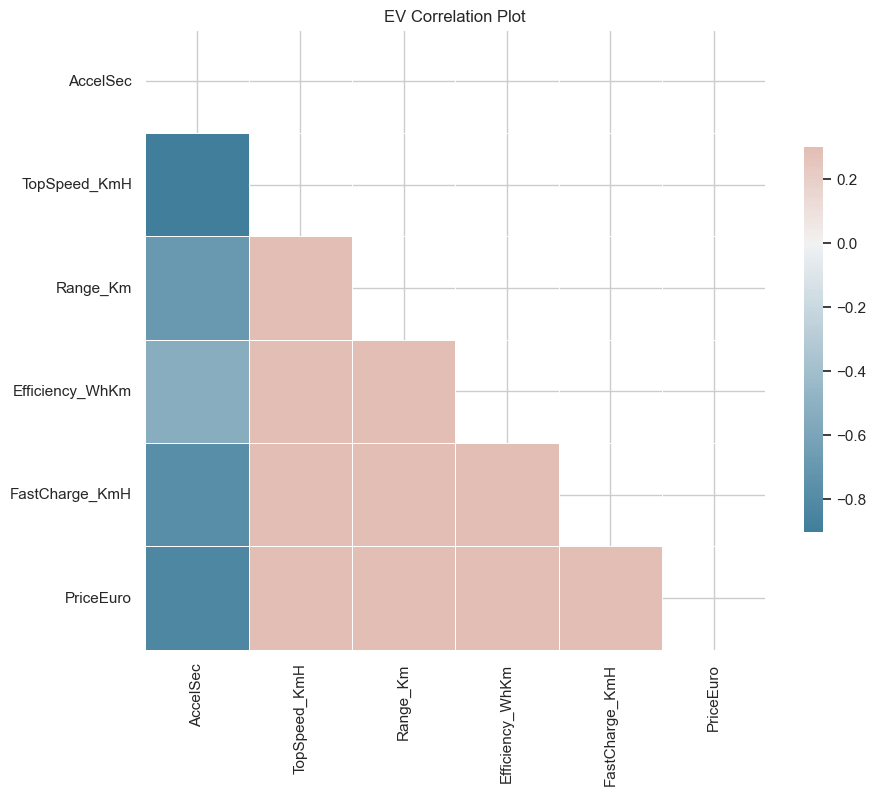

In [12]:
performance_cols = ['AccelSec', 'TopSpeed_KmH', 'Range_Km','Efficiency_WhKm', 'FastCharge_KmH', 'PriceEuro']
df_corr = df_ev[performance_cols].corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('EV Correlation Plot')
plt.savefig(EDA_PLOT_DIR + 'ev_features_corr.png') ;

The correlation plot shows that the price of the the EV is directly correlated with all the performance features except for acceleration, which makes sense: lower acceleration times indicate better performance. 
Let's build a simple linear regression and see well we can predict the price of the EV given these performance features. 

Mean Squared Error: 163566859.6593005
Mean Absolute Error: 9997.629685540287
R-squared: 0.7657383429245084


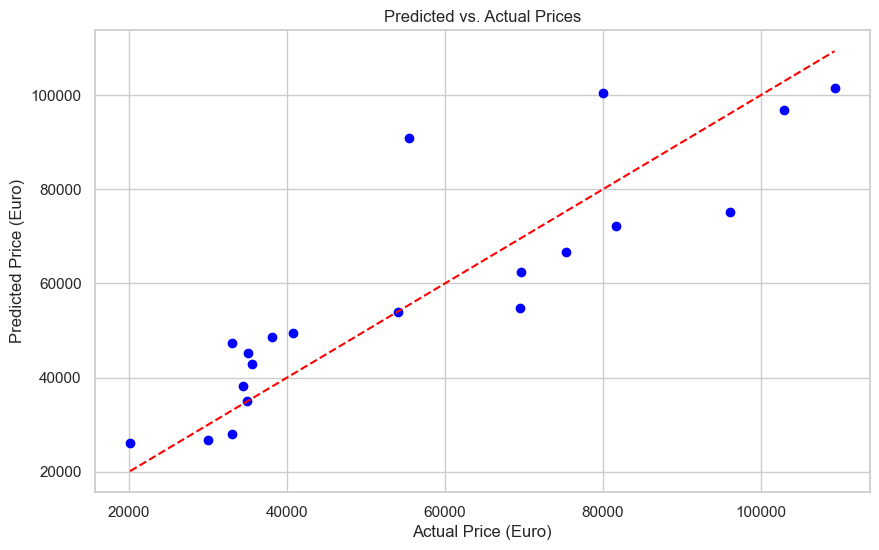

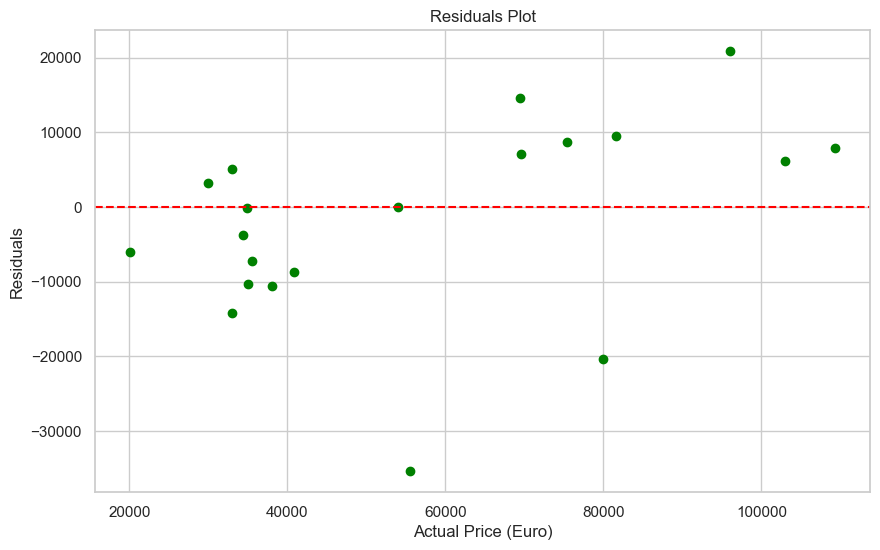

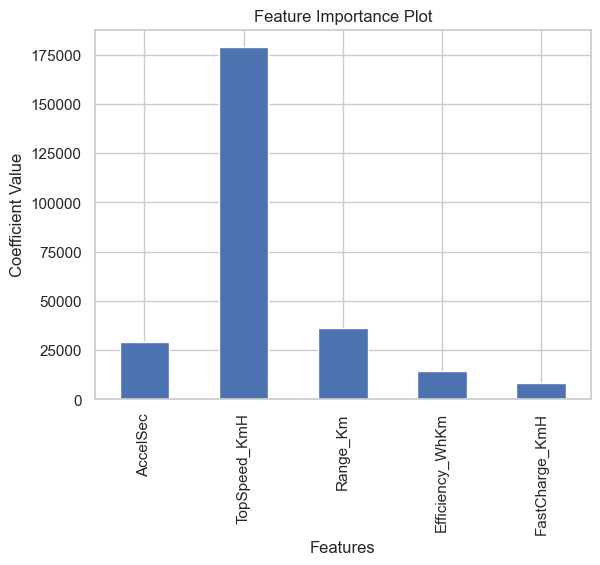

In [13]:
rt = RegressionTrainer(df_ev, LinearRegression())
rt.train()

### Observations 

We can see from the **Predicted vs. Actual Prices plot** that the model's predictions are close to the true price values. 

The **Residuals Plot** shows us that most model errors are within 10K euros. The average EV price is about 57K euros. This means that the model error is on average within 17%. 

The **Feature Importance plot** shows up that the **TopSpeed_KmH** performance feature is by far the most predictive of EV price. While features like Efficiency_WhKm and FastCharge_KmH are the least related to EV price. Assume that what the the EV brands are providing directly reflects consumer wants, we can conclude that higher end EV drivers greatly value an EV that can reach high top speeds. 

The coefficients associated with each feature indicate how much the target variable is expected to change when that feature changes by one unit, assuming all other features remain constant. The coefficient value for TopSpeed_kWh is quite large at just over 175K, the few outliers might be influencing this outcome. Also the directly correlation between AccelSec and Price doesn't make any sense, there should be an inverse correlation. 

Let's see how our model performance changes when we exclude the few super luxury EV and only include more typical EVs. 

Let's re-train the model but this time only include the EVs that fall within the first 75 percentile of EV prices. 

In [14]:
df_ev.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,7.046939,181.653061,350.153061,189.867347,4.959184,57324.683673
std,2.483895,43.248527,118.217984,30.055837,0.687418,34288.246370
min,2.100000,123.000000,170.000000,104.000000,4.000000,20129.000000
25%,5.100000,150.000000,258.750000,168.000000,5.000000,35000.000000
50%,7.300000,167.000000,350.000000,181.000000,5.000000,45000.000000
75%,8.950000,200.000000,407.500000,206.000000,5.000000,65465.000000
max,14.000000,410.000000,970.000000,273.000000,7.000000,215000.000000


Mean Squared Error: 22071307.927855786
Mean Absolute Error: 3645.735550051395
R-squared: 0.8471465734948818


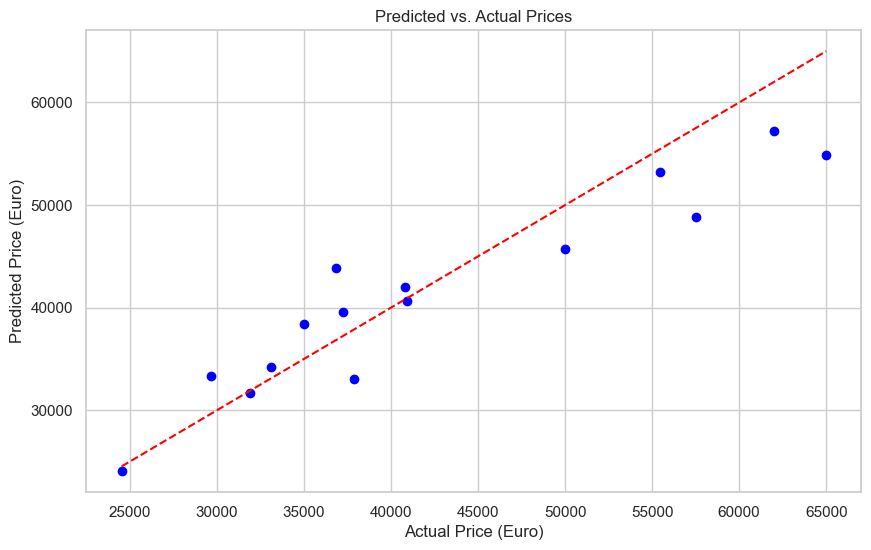

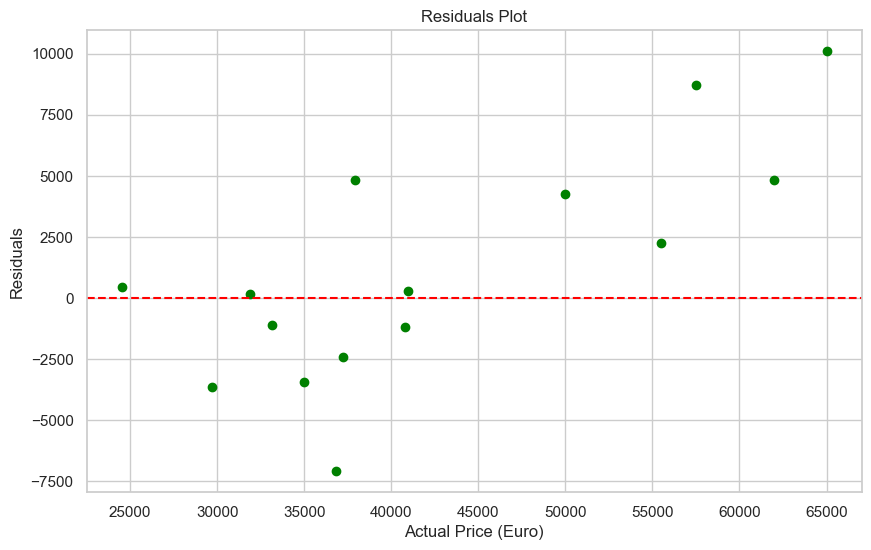

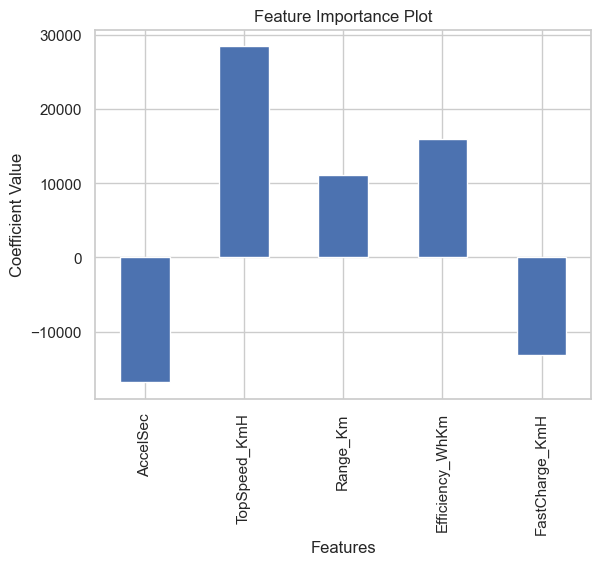

In [15]:
quantile_75 = df_ev.PriceEuro.quantile(0.75)
df_ev_quantile_75 = df_ev[df_ev.PriceEuro <=quantile_75]


rt = RegressionTrainer(df_ev_quantile_75, LinearRegression())
rt.train()

### Observations 

These results to look better than the previous ones. 

We can see from the **Predicted vs. Actual Prices plot** that the model's predictions are tighter this time. 

The **Residuals Plot** shows us that most model errors are within 5K euros, that's a 50% reduction in error than previously. The average EV price is now about about 42K euros. This means that the model error is on average within 11%, a drop from the previous 17% typical error.  

The **Feature Importance plot** shows up that the **TopSpeed_KmH** performance feature is still by the most predictive of EV price. Top speed, range, and efficiency are positively correlated with EV price, which makes sense: the faster the car, the longer the rang, and the more energy efficient the higher the price of the EV. 

However the coefficient value of AccelSec now makes sense unlike previously. It is telling us that as acceleration times drop, the price of the EV increases which agrees with our correlation plot and intuitions about how cars are priced. The same inverse relationship holds between faster charging times; the shorter the charge time, the pricier the EV. 

Let's revisit our hypothesis: 

1) Brand and Model of EV performance is directly correlated with EV price

Yes, we have demonstrated with our linear regression that as the performance of the EV increases so will the EV price. We have also show that the correlation is indeed linear. While this analysis is sufficient for our needs let's provide some suggestions for how to improve the model. 

How the improve the Regression model's performance:

1) Apply regularization regression to minimize any over fitting which will reduce test set error. 
3) This is a small dataset. Try bootstrap sampling or other over sampling techniques to increase the training set size. 
4) Training a non-linear FR model might performance better than a linear model since 
    1) Internal bootstrap sampling technique overcomes small sample issues and, 
    2) Provides a non-linear model comparison that might perform better than a linear model

Mean Squared Error: 18081850.092458252
Mean Absolute Error: 3278.601955555556
R-squared: 0.8747753076882272


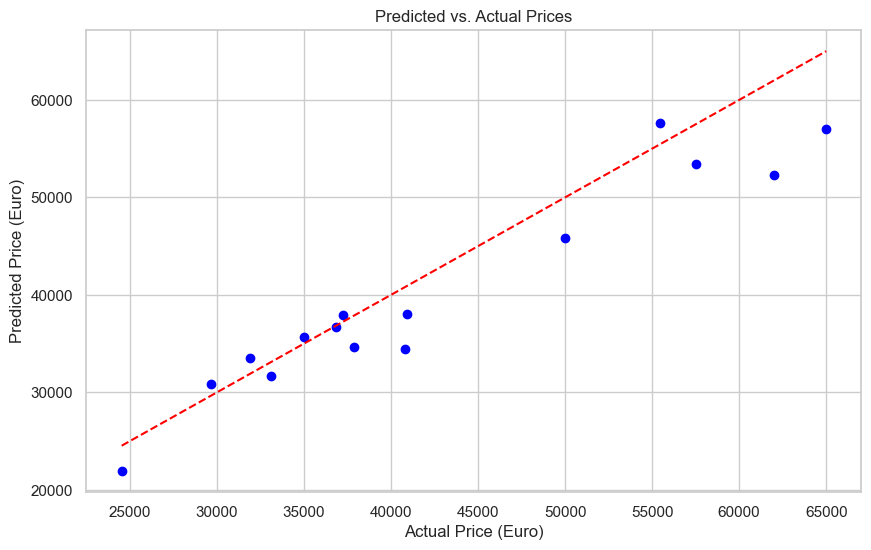

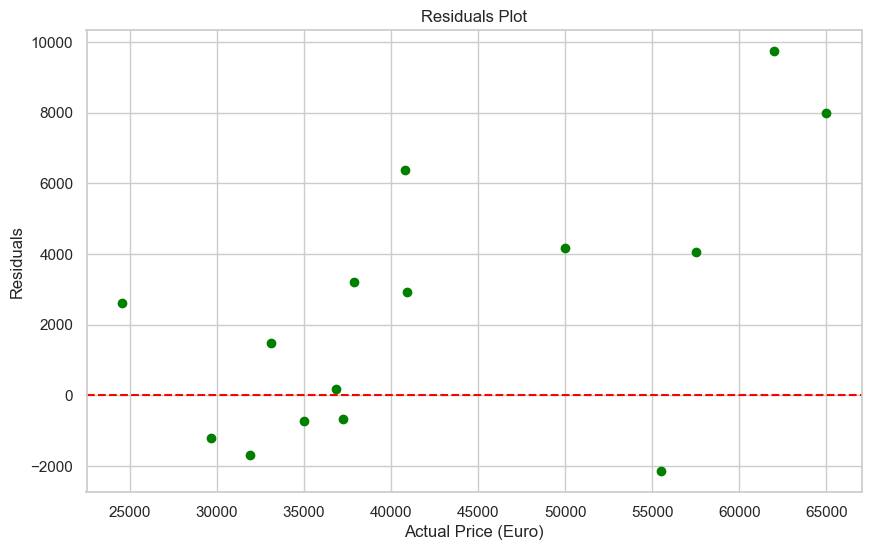

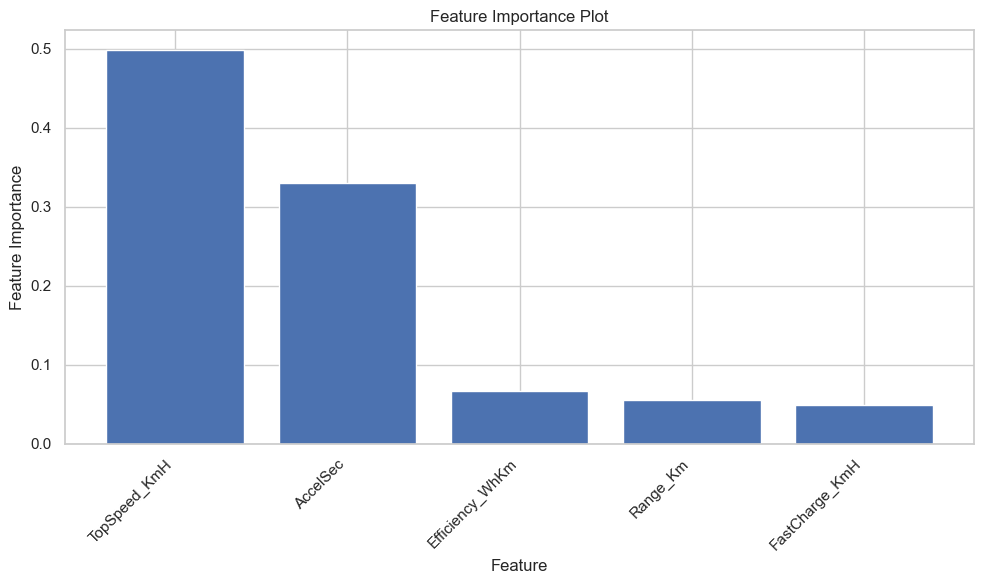

In [16]:
rt = RegressionTrainer(df_ev_quantile_75, RandomForestRegressor(random_state=4321))
rt.train()

### Observations 

- The Mean Absolute Error for RF is 3278
- The mean Absolute Error for LR is 3645
- That's a 14% drop in MAE meaning RF does perform better than a linear model

The Random Forest Feature importance plot shows us that this model too has identified that sport car performance features top speed and lower acceleration times are most predictive of the EV price. 

We can see from the **Predicted vs. Actual Prices plot** that the model's predictions are closer to the true price values.  

The **Residuals Plot** shows us that most model errors are within 5K euros, that's a 50% reduction in error than previously. The average EV price is now about about 42K euros. This means that the model error is on average within 11%, a drop from the previous 17% typical error. Also Random Forest's errors tend to overestimate the price of the EV more so when the EV is in the higher price range. This might because there are less training samples for higher end EVs; a larger dataset would likely help correct this bias. 

The **Feature Importance plot** shows up that the **TopSpeed_KmH** and ***AccelSec** performance features are by far the most predictive of EV price. 

------

# EV Charging Exploratory Analysis 

Now we'll move onto the second dataset and attempt the answer the following questions and test the following hypotheses. 


Some questions we have about the EV charging dataset from the start are: 

1) What's are the distributions of charging time, total kWh charged, charging cost, and charging dates?
2) What's the distribution of distance between user home and charging station?
3) What's the distribution of user's phone's OS? 

Initial Hypotheses to test
1) Weekend EV charges are longer than weekday EV charges 
2) Majority of EV owners use the same small number of charging stations

In [ ]:
df_charging.head()

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0


In [ ]:
# we'll address the NaNs when appropriate 
df_charging.isnull().sum()

sessionId            0
kwhTotal             0
dollars              0
created              0
ended                0
startTime            0
endTime              0
chargeTimeHrs        0
weekday              0
platform             0
distance          1065
userId               0
stationId            0
locationId           0
managerVehicle       0
facilityType         0
Mon                  0
Tues                 0
Wed                  0
Thurs                0
Fri                  0
Sat                  0
Sun                  0
reportedZip          0
weekend              0
dtype: int64

In [ ]:
df_charging.dtypes

sessionId           int64
kwhTotal          float64
dollars           float64
created            object
ended              object
startTime           int64
endTime             int64
chargeTimeHrs     float64
weekday            object
platform           object
distance          float64
userId              int64
stationId           int64
locationId          int64
managerVehicle      int64
facilityType        int64
Mon                 int64
Tues                int64
Wed                 int64
Thurs               int64
Fri                 int64
Sat                 int64
Sun                 int64
reportedZip         int64
weekend             int64
dtype: object

### Investigate the Distributions 

1) What's are the distributions of charging time, total kWh charged, charging cost, and charging dates?
2) What's the distribution of distance between user home and charging station?
3) What's the distribution of user's phone's OS? 


Let's plot the distributions of the features answer our questions. 

/var/folders/_b/bg10lw5s3qv87q59tkf0hsrc0000gn/T/ipykernel_11345/1780818619.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
/var/folders/_b/bg10lw5s3qv87q59tkf0hsrc0000gn/T/ipykernel_11345/1780818619.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
/var/folders/_b/bg10lw5s3qv87q59tkf0hsrc0000gn/T/ipykernel_11345/1780818619.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


/var/folders/_b/bg10lw5s3qv87q59tkf0hsrc0000gn/T/ipykernel_11345/1780818619.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


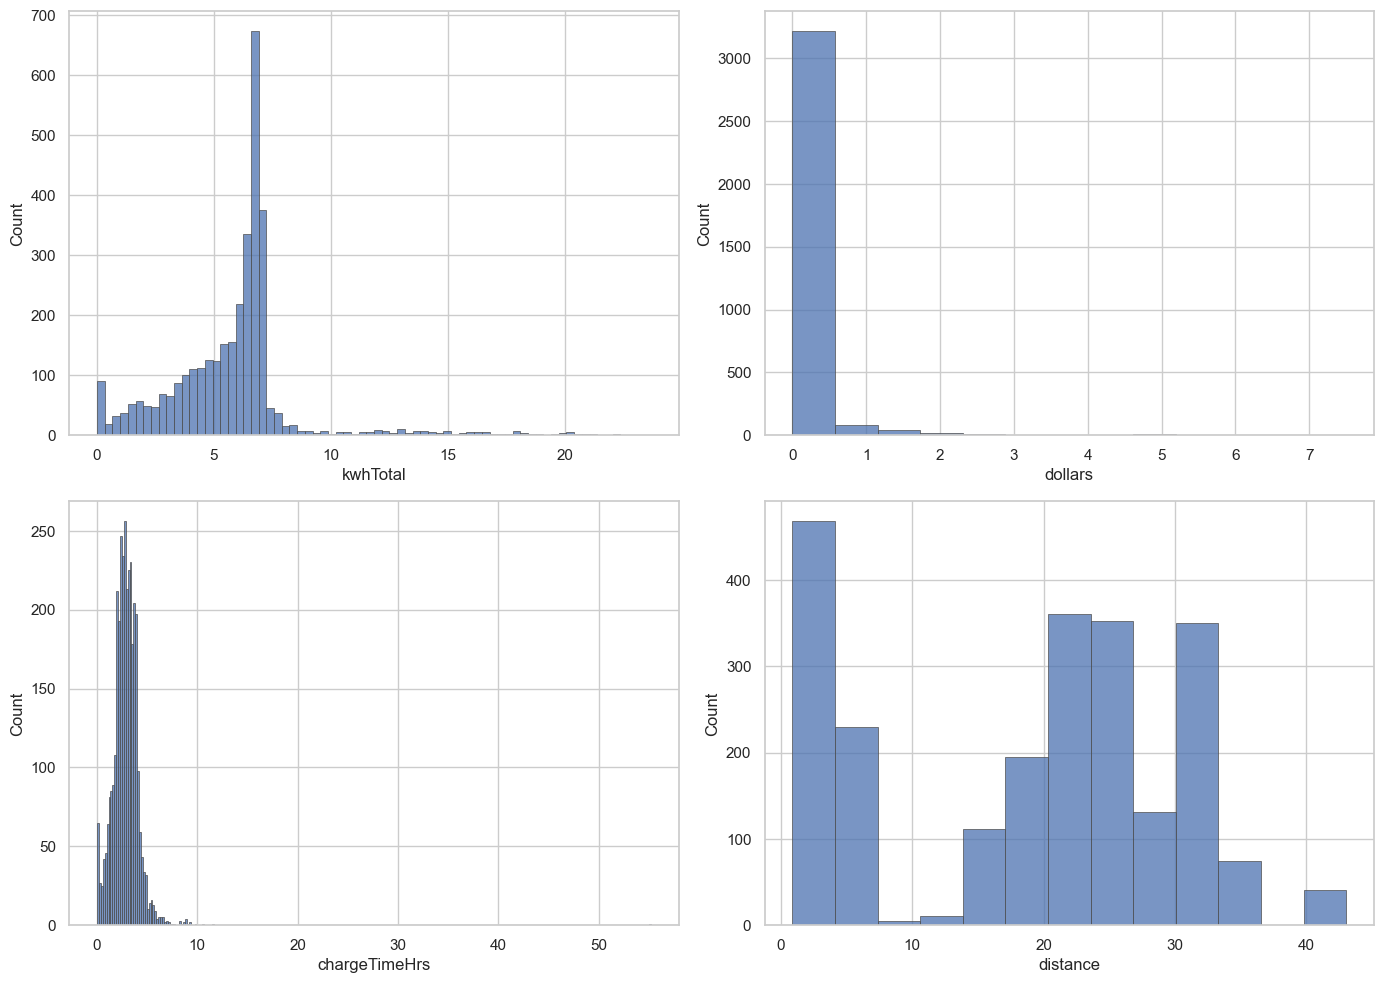

In [19]:
sns.set_theme(style="whitegrid")

# Define the columns for plotting
cols = ['kwhTotal', 'dollars', 'chargeTimeHrs', 'distance']

# Create subplots with a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Iterate over the columns and plot each one in a subplot
for i, col in enumerate(cols):
    sns.histplot(
        df_charging[col],
        ax=axes[i],
        palette="light:m_r",
        edgecolor=".3",
        linewidth=.5,
        log_scale=False
    )
    axes[i].set_xlabel(col)

# Adjust layout
plt.tight_layout()
#plt.title('EV Performance Features')
plt.savefig(EDA_PLOT_DIR + 'EV Performance Features Univariate Plots.png')
plt.show()


In [27]:
df_charging[cols].describe()

,kwhTotal,dollars,chargeTimeHrs,distance
count,3395.000000,3395.000000,3395.000000,2330.000000
mean,5.809629,0.118268,2.841488,18.652378
std,2.892727,0.492562,1.507472,11.420571
min,0.000000,0.000000,0.012500,0.856911
25%,4.350000,0.000000,2.110278,5.135871
50%,6.230000,0.000000,2.808889,21.023826
75%,6.830000,0.000000,3.544167,27.285053
max,23.680000,7.500000,55.238056,43.059292


### Observations of Univariate Plots

**kWh Total** represents total energy used in charging the EV. 
- There appears to be a exponential increase in energy used for charging between 0 and about 7 hours, then a share drop off where very few people are charging their EV for more time more. 

**Dollars** represents total currency paid to charge the EV. 
- At least 75% of EV drivers are paying $0 to charge their EVs. Perhaps there is a government or manufacture subsidy. 

**Charge Time Hrs** represents total charge time. 
- The distribution is strongly skewed to less than 5 hours. The median charge time is 2.8 hours and at least 75% of EV drivers spend around 3.5 hours or less charging their car. 

**Distance** represents distance from a user's home to the charging location, expressed in miles except where user did not report address. 
- There seems to be two major groups of users here: those that drive around 5 miles to charge their EV and those that drive anywhere between 15 to 35 miles to charge their EVs. 
- We can only speculate why we see two groups, perhaps the first group are those that commute to work while the second group are weekend travelers.  

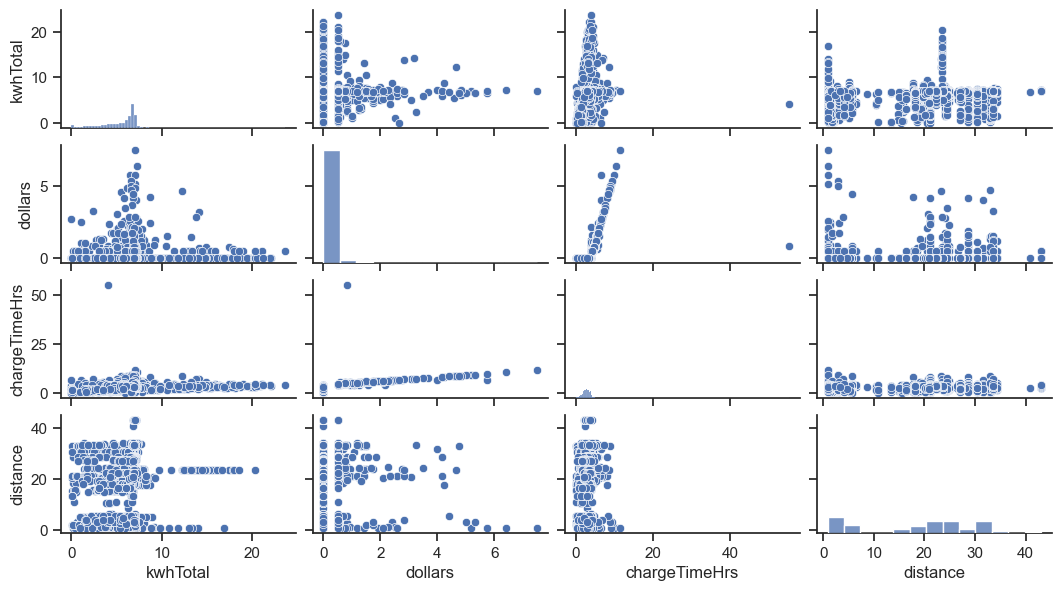

In [29]:
cols = ['kwhTotal', 'dollars', 'chargeTimeHrs', 'distance']

sns.set_theme(style="ticks")
sns.pairplot(df_charging[cols], height=1.5, aspect=1.8);

### Observations of Bi-Variate Plots 

- We can see a linear relationship with a mildly positive slope between charging time and dollars. kWh prices are provided as a rate $/kWh so the linear relationship is as expected. 
- There is an outlier. 

- There isn't a correlation between charging time and distance traveled away from driver's home. 
- There is an  outlier.

- kWh Total vs charging Time is interesting because it shows that for the same amount of charging time, say 2 hours, the kWh total can vary wildly from near zero to over 20kWh, why might this be?
    - Perhaps the charge rate of the EVs varies 
    - Perhaps the charging rate of EV stations also varies 
    - This information isn't provided in this dataset 

- There doesn't seem to be a significant difference in kWh total by distance traveled. 
- This might be explained by the energy capacity of an EV's battery


## Hypothesis Testing
1) Weekend EV charges are longer than weekday EV charges 
2) Majority of EV owners use the same small number of charging stations

### 1st Hypothesis: Weekend EV charges are longer than weekday EV charges 

Let's re-state our hypothesis in way that we can test. 

$H_{0}$ The weekend mean charge time of EVs is greater than non-weekend mean charge times, $\mu_{weekend} > \mu_{not-weekend}$

$H_{A}$ The weekend mean charge time of EVs is smaller than the non-weekend mean charge times, $\mu_{weekend} < \mu_{not-weekend}$


The reason for the interest in answering this hypothesis is to check the intuition that drivers might not have the free time to dedicate to longer charge times at stations located away from their homes. Longer charge times at stations away from the homes might be reserved for the weekend. If these were at home charging stations, then we would expect that EV owners would charge their EVs over night leading to potentially longer charge times, thereby changing the direction of the inequality in our hypothesis. 

/var/folders/_b/bg10lw5s3qv87q59tkf0hsrc0000gn/T/ipykernel_81687/3921129542.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Weekend")


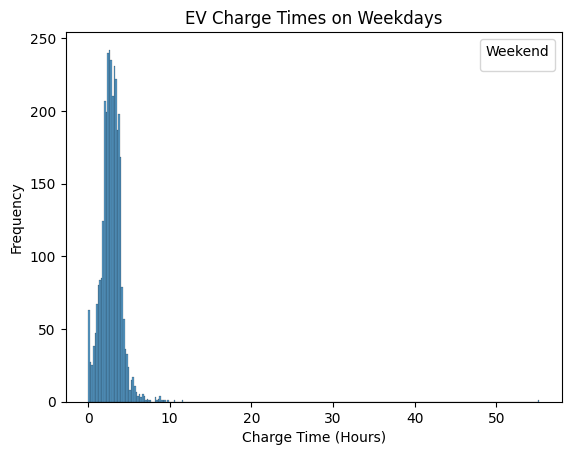

/var/folders/_b/bg10lw5s3qv87q59tkf0hsrc0000gn/T/ipykernel_81687/3921129542.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Weekend")


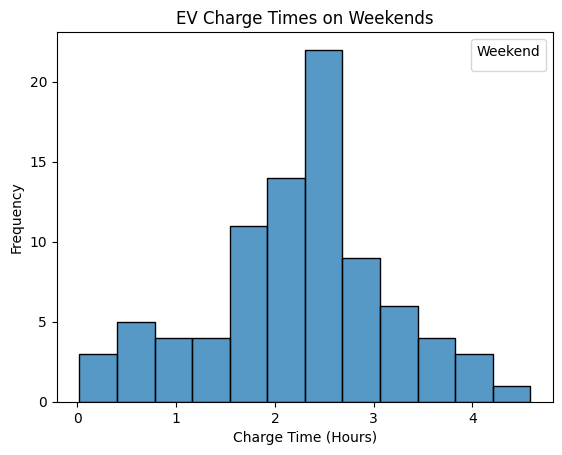

In [9]:
dist1 = df_charging[df_charging.weekend == 0]
dist2 = df_charging[df_charging.weekend == 1]

# Draw histograms to show the distribution of charging bills by day and time
sns.histplot(data=dist1, x="chargeTimeHrs")
plt.xlabel("Charge Time (Hours)")
plt.ylabel("Frequency")
plt.title("EV Charge Times on Weekdays")
plt.legend(title="Weekend")
plt.show()

# Draw histograms to show the distribution of charging bills by day and time
sns.histplot(data=dist2, x="chargeTimeHrs")
plt.xlabel("Charge Time (Hours)")
plt.ylabel("Frequency")
plt.title("EV Charge Times on Weekends")
plt.legend(title="Weekend")
plt.show();

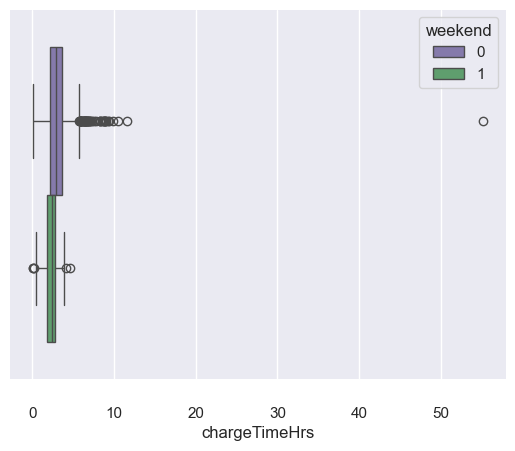

In [59]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="chargeTimeHrs",
            hue="weekend", palette=["m", "g"],
            data=df_charging)
sns.despine(offset=10, trim=True)

plt.show()

In [4]:
def create_weekend_feature(df):
    # Create a new binary feature 'weekend' based on the 'weekday' column
    df['weekend'] = df['weekday'].isin(['Sat', 'Sun']).astype(int)  # 5 and 6 correspond to Saturday and Sunday
    
    return df
df_charging = create_weekend_feature(df_charging)

df_charging.groupby(['weekend'])['chargeTimeHrs'].describe()

,count,mean,std,min,25%,50%,75%,max
weekend,,,,,,,,
0,3309.0,2.857056,1.516678,0.0125,2.121667,2.826667,3.567778,55.238056
1,86.0,2.242468,0.918256,0.0200,1.791875,2.406806,2.708194,4.587500


We can see from the boxplot (despite the outlier smashing the plots) and the statistical table that the weekend charge means might be statistically different. 

Let's go ahead and test that hypothesis. 

 When using the t-test, we assume that the data is normally distributed and has equal variances. If these assumptions are violated, consider using non-parametric tests like the Mann-Whitney U test, which make fewer assumptions about the data distribution.

 Both the charging times for weekend and weekdays are approximately normal however the variances are not equal. For that reason, we are going to perform both the t-test and the Mann-Whitney U test to test is the means of both distributions are equal or not. 

In [10]:
import numpy as np
from scipy import stats

# Generate two random distributions
np.random.seed(0)
dist1 = df_charging[df_charging.weekend == 0]['chargeTimeHrs'].values
dist2 = df_charging[df_charging.weekend == 1]['chargeTimeHrs'].values


# Perform one-tailed independent samples t-test
# alternative='greater' specifies that the alternative hypothesis is that the mean of dist1 (weekday) is greater than the mean of dist2 (weekend)
t_stat, p_value = stats.ttest_ind(dist1, dist2, alternative='greater')
print("T-test - t-statistic:", t_stat, "p-value:", p_value)

T-test - t-statistic: 3.7397452685754264 p-value: 9.36247867770464e-05


 Since the p-value is less than the significance level (0.05), we can reject the null hypothesis and conclude that the mean of  dist1 (weekday) is statistically significantly greater than the mean of dist2 (weekend). 

 Thus EV drivers in this dataset, on average, spend more time charging their EVs on away-from-home stations on weekdays instead of weekends, contradicting the intuition for this hypothesis that drivers might not have the free time to dedicate to longer charge times at stations located away from their homes during weekdays.

### 2nd Hypothesis Test: Majority of EV owners use the same small number of charging station locations. 

Let's re-state this hypothesis in a form that we can test.

We can re-state this hypothesis by formulating a null hypothesis that the distribution of the number of unique charging locations used by EV drivers follows a uniform distribution, meaning there is no majority of drivers that use a larger or smaller count of unique charging locations. The alternative hypothesis that there is no uniform distribution of EV drivers using the same number of charging stations. 

This test alone doesn't tell us, in the alternative case, if the majority of EV drivers use a small or large number of charging station locations only that there is a statistically significant concentration of use away from a hypothetical uniform use towards a larger or smaller number of charging station locations. Once we have this result, assuming the alternative case, we can then perform additional statistics to decisively determine if the concentration of use is towards a smaller number or larger number of charging station locations. 

We can then perform a statistical test to determine whether the observed distribution significantly deviates from a uniform distribution. We can do this by using a goodness-of-fit test, such as the chi-square test, to compare the observed distribution to the expected uniform distribution. If the p-value of the test is below a certain significance level (0.05), we can reject the null hypothesis and conclude that there is a majority of EV drivers using a small number of charging stations.


$H_{0}$ The distribution of the number of unique charging locations used by EV drivers follows a uniform distribution.

$H_{A}$  The distribution of the number of unique charging locations used by EV drivers does not follow a uniform distribution.

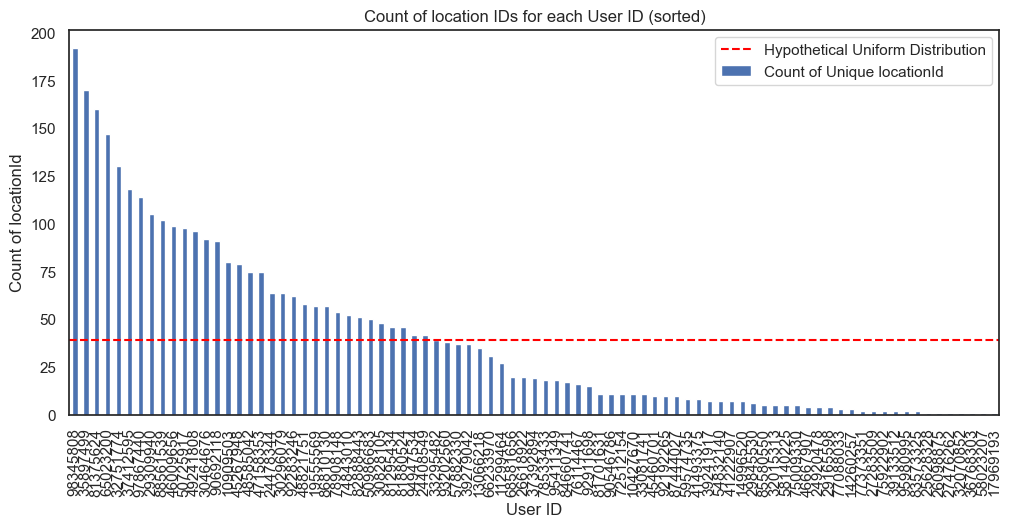

In [21]:
# Calculate count of locationId for each userId
counts = df_charging.groupby('userId')['locationId'].count()

# Sort the counts in descending order
sorted_counts = counts.sort_values(ascending=False)

sns.set_theme(style="white")
# Plot the sorted counts
plt.figure(figsize=(12,5))
sorted_counts.plot(kind='bar', label='Count of Unique locationId')

# Draw a horizontal red dashed line at y=39
plt.axhline(y=39, color='red', linestyle='--', label='Hypothetical Uniform Distribution')

# Add legend
plt.legend()

# Show the plot
plt.xlabel('User ID')
plt.ylabel('Count of locationId')
plt.title('Count of location IDs for each User ID (sorted)')
plt.savefig(EDA_PLOT_DIR + 'Count of charging station Ids used by each User Id.png')
plt.show()

In [92]:
from scipy.stats import chisquare

# observed frequencies (counts of unique charging stations)
observed_counts = df_charging.groupby('userId')['locationId'].count()

# To flatten the observed_counts to form a uniform distribution, 
# uniform_count is the value for each bar that allows us to do that
uniform_count = float(observed_counts.sum()/ len(observed_counts))

# calculate expected frequencies (under the assumption of uniform distribution)
expected_counts = np.full_like(observed_counts, uniform_count, dtype=float)

# perform chi-square test
chi2_stat, p_value = chisquare(f_obs=observed_counts.values.tolist(), f_exp=expected_counts.tolist(), axis=None)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square statistic: 4186.674521354935
P-value: 0.0


In [95]:
# the value of each bar in the uniform distribution 
uniform_count

39.94117647058823

In [94]:
observed_counts.describe()

count     85.000000
mean      39.941176
std       44.617515
min        1.000000
25%        5.000000
50%       19.000000
75%       58.000000
max      192.000000
Name: locationId, dtype: float64

In [102]:
observed_counts.quantile(.61)

39.720000000000006

### Observations 

**Chi-square test**
The resulting p-value from the chi-square test is 0 indication that we reject the null hypothesis in favor of the alternative which states that the distribution is statistically significantly different from a uniform distribution. We can actually observe from the "Count of location IDs for each User ID (sorted)" plot that this is obviously true, however we want to be rigorous in our work. These results provide statistical evidence that there is indeed a concentration of EV drivers using concentrating towards a small or large number of unique charging locations. 

**Additional Statistics**
To determine if there is a majority of EV driver concentration towards a smaller or larger number of unique charging locations we need to consult additional statistics. 
The statistical table right above shows gives us the percentile of the distribution. We also know that the uniform_count is about 40, which lies somewhere between the 50th and 75th percentiles, specifically it lies at the 61th percentile. 61% of EV drivers use 40 or less charging stations while 39% of EV drivers use more than 40 charging stations. 
Thus we can conclude that a clear, but overwhelming, majority of EV drivers do indeed stick to a smaller number of charging locations. 